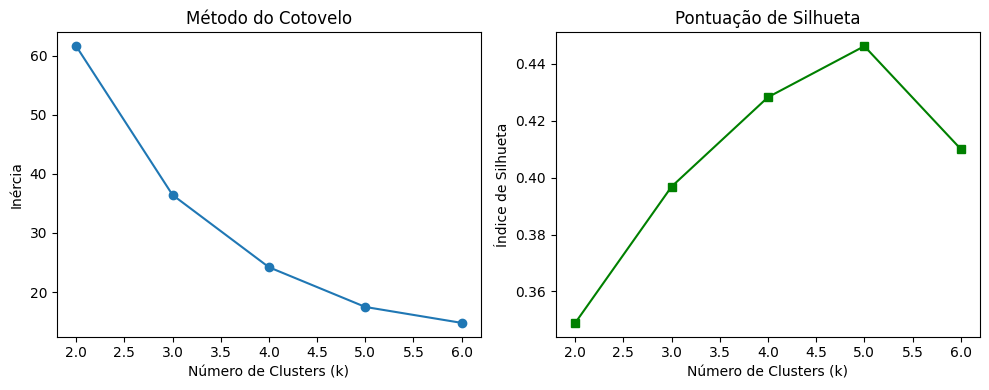

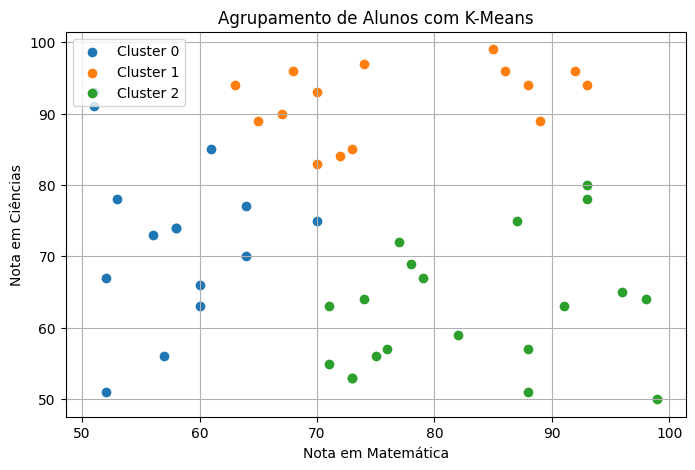

   Matemática  Ciências  Cluster
0          88        51        2
1          78        69        2
2          64        77        0
3          92        96        1
4          57        56        0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Gerando dados fictícios: Notas de matemática e ciências para 50 alunos
np.random.seed(42)
notas_matematica = np.random.randint(50, 100, 50)  # Notas entre 50 e 100
notas_ciencias = np.random.randint(50, 100, 50)  # Notas entre 50 e 100

# Criando DataFrame
df = pd.DataFrame({"Matemática": notas_matematica, "Ciências": notas_ciencias})

# Padronizando os dados para melhor performance do K-Means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determinando o número ideal de clusters com o método do cotovelo
inertia = []
silhouette_scores = []
k_range = range(2, 7)  # Testando de 2 a 6 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Criando gráfico para encontrar o melhor K
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker="o", linestyle="-")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker="s", linestyle="-", color="green")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Índice de Silhueta")
plt.title("Pontuação de Silhueta")

plt.tight_layout()
plt.show()

# Escolhendo o número ideal de clusters (com base no gráfico, geralmente k=3)
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(df_scaled)

# Visualizando os clusters
plt.figure(figsize=(8, 5))
for cluster in range(k_optimal):
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(cluster_data["Matemática"], cluster_data["Ciências"], label=f"Cluster {cluster}")

plt.xlabel("Nota em Matemática")
plt.ylabel("Nota em Ciências")
plt.title("Agrupamento de Alunos com K-Means")
plt.legend()
plt.grid(True)
plt.show()

# Exibindo os primeiros registros do DataFrame
print(df.head())  # Mostra os primeiros 5 alunos com seus clusters
